In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Linear First Order Differential Equation
$$
\frac{dy}{dx} + p(x)y = q(x)
$$
<b>General Solution </b>
Introduce integration factor: $\mu = e^{\int p(x) dx}$
$$
\frac{dy}{dx} + p(x)y = q(x) \implies \frac{d}{dx}(y\mu) = q(x)\mu
$$

\begin{align*}
y = \frac{1}{\mu}\int q(x)\mu dx + C
\end{align*}


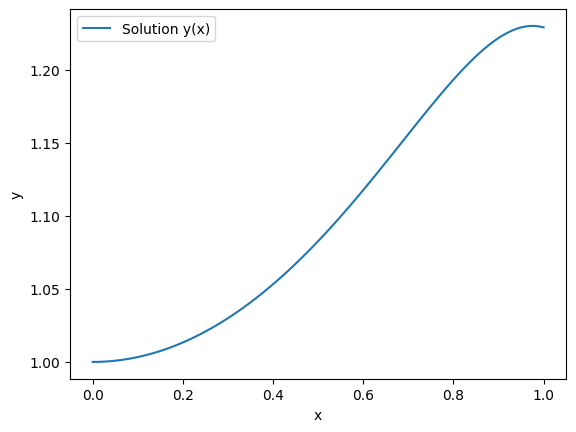

In [3]:
from scipy.integrate import cumulative_trapezoid

# First Order Differential Equation
# Given in the form of a(x) y' + b(x)y = c(x)
def odeLinearFirstOrder(a, b, c, x, C=0):
    dx = x[1] - x[0]  # Step size
    
    # Compute integration factor
    mu = np.exp(cumulative_trapezoid(b(x)/a(x), x, initial=0))
    
    # Compute integral of (c(x)/a(x)) * mu
    integral_part = cumulative_trapezoid((c(x)/a(x)) * mu, x, initial=0)
    
    # General solution
    y = (1/mu) * (integral_part + C)
    
    return y

# Example
a = lambda x: 3*np.e**x
b = lambda x: 5*x**7
c = lambda x: 2*x*np.exp(x)

x = np.linspace(0, 1, 100)
C = 1  # Arbitrary constant

y = odeLinearFirstOrder(a, b, c, x, C)

# Plotting the solution
plt.plot(x, y, label="Solution y(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


# Eulers Method

- provides an approximation to various values called **mesh points**, in the interval $[a,b]$. Once the approximate solution is obtained, a continous approxijmate solution at the other points in the interval can be found by interpolation. 

## Mesh Points:
$$
t_i = a+ih, \quad \text{for each } i = 0,1,2, \dots , N
$$
Distance between points = $h = (b-a)/N = x_{i+1} - x_i$ is called the **step size**

Use Taylor's Theorem to derive Euler's method:

$$
\frac{dy}{dx} = f(x,y)
$$
Assume the solution to this has two continous derivatives on $[a,b]$ so that for each $i=0,1,2..,N-1$
$$
y(x_{i+1}) = y(x_i) + (x_{i+1} - x_i)y'(x_i) + \frac{(x_{i+1}-x_i)^2}{2}y''(\xi_i)
$$

We have $h=x_{i+1}-x_i$ we get:
$$
y(x_{i+1}) = y(x_i) + (h)y'(x_i) + \frac{h^2}{2}y''(\xi_i)
$$
and because $y(x)$ satifies the differential equation: $y'=f(x,y(x))$
$$
y(x_{i+1}) = y(x_i) + (h)f(x_i,y(x_i)) + \frac{h^2}{2}y''(\xi_i)
$$
and so construct approximations to $y(t_i)=w_i$ giving Eulers method is:
\begin{align*}
w_0 &= \alpha \\
w_{i+1} &= w_i + hf(x_i, w_i), \quad \text{for each } i = 0,1, \dots, N-1
\end{align*}
where $\alpha$ is initial condition at the start of the boundry $a \leq x \leq b$, $\alpha=y(a)$

In [4]:
def eulers(f, a, b, alpha, N=None, h=None):
    

    # Determine step size
    if h is not None:
        N = int((b - a) / h)
    elif N is not None:
        h = (b - a) / N
    else:
        raise ValueError("Either N (steps) or h (step size) must be provided.")
    
    
    w = np.zeros(N+1)
    x = np.linspace(a,b,N+1)
    w[0] = alpha
    for i in range(N):
        w[i+1] = w[i] + h*f(x[i], w[i])
        print(w[i+1])
        
    return w


def f(x,y):
    return y-x**2 + 1 

eulers(f, 0, 2,0.5,4)


1.25
2.25
3.375
4.4375


array([0.5   , 1.25  , 2.25  , 3.375 , 4.4375])

In [5]:
eulers(f, 0, 2,0.5,4)

1.25
2.25
3.375
4.4375


array([0.5   , 1.25  , 2.25  , 3.375 , 4.4375])

In [ ]:
def eulers(f, a, b, alpha, N=None, h=None):
    # Determine step size
    if h is not None:
        N = int((b - a) / h)
    elif N is not None:
        h = (b - a) / N
    else:
        raise ValueError("Either N (steps) or h (step size) must be provided.")
    
    # Initialize arrays
    x = np.linspace(a, b, N + 1)
    w = np.zeros(N + 1)
    w[0] = alpha

    # Euler iteration
    for i in range(N):
        w[i + 1] = w[i] + h * f(x[i], w[i])

    # Create a Pandas DataFrame
    df = pd.DataFrame({'x': x, 'w': w})
    
    return df

# Example usage:
def f(x, y):
    return x**2

df_results = eulers(f, 0, 1, 2, N=5)
print(df_results)

     x      w
0  0.0  2.000
1  0.2  2.000
2  0.4  2.008
3  0.6  2.040
4  0.8  2.112
5  1.0  2.240


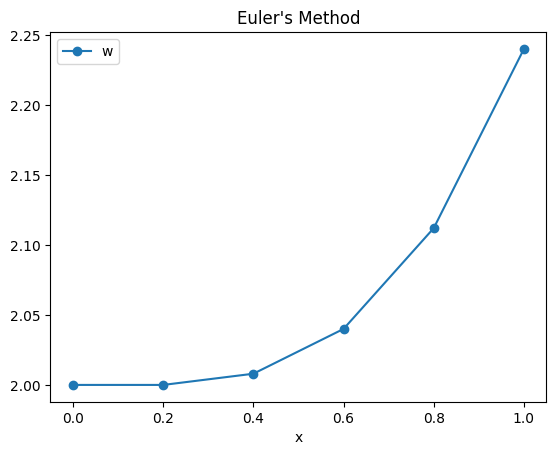

In [27]:
df_results.plot(x='x', y='w', marker='o', linestyle='-', title="Euler's Method")
plt.show()

      x        w
0   0.0   1.0000
1   0.1   2.0000
2   0.2   2.9995
3   0.3   3.9985
4   0.4   4.9970
5   0.5   5.9950
6   0.6   6.9925
7   0.7   7.9895
8   0.8   8.9860
9   0.9   9.9820
10  1.0  10.9775
11  1.1  11.9725
12  1.2  12.9670
13  1.3  13.9610
14  1.4  14.9545
15  1.5  15.9475
16  1.6  16.9400
17  1.7  17.9320
18  1.8  18.9235
19  1.9  19.9145
20  2.0  20.9050
21  2.1  21.8950
22  2.2  22.8845
23  2.3  23.8735
24  2.4  24.8620
25  2.5  25.8500
26  2.6  26.8375
27  2.7  27.8245
28  2.8  28.8110
29  2.9  29.7970
30  3.0  30.7825


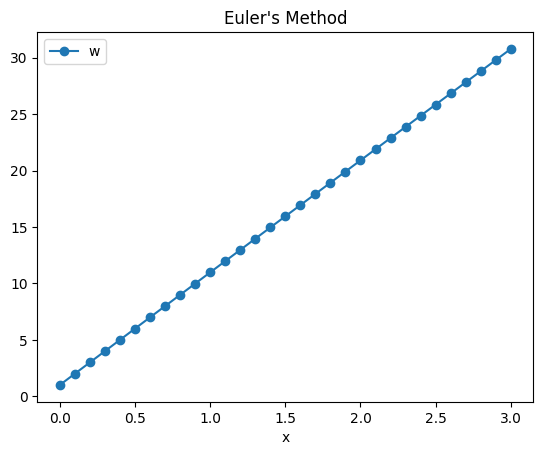

In [8]:
def f(x, y):
    return 10-1/20 * x

eulers(f, 0, 3, 100, h=0.1)
df_results = eulers(f, 0, 3, 1, h=0.1)
print(df_results)
df_results.plot(x='x', y='w', marker='o', linestyle='-', title="Euler's Method")
plt.show()


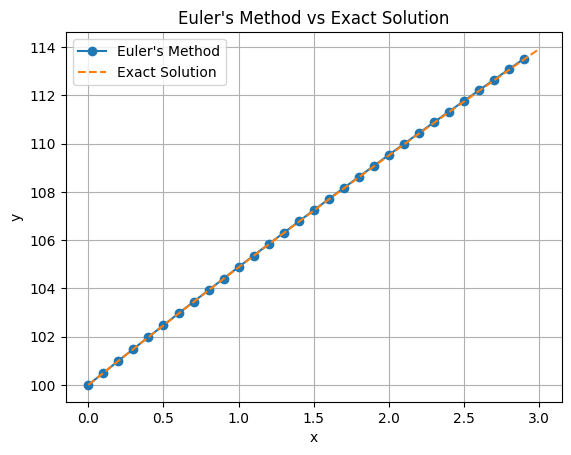

In [23]:

def f(x, y):
    return 10-1/20 * y

def exact_solution(x):
    return 200 - 100 * np.e**(-x/20)

def eulers(func, x0, y0, x_end, h=0.1):
    # Create a list to store the x and y values
    x_values = []
    y_values = []

    # Initialize values
    x = x0
    y = y0

    while x <= x_end:
        x_values.append(x)
        y_values.append(y)
        
        # Calculate the next values using Euler's formula
        y = y + h * func(x, y)
        x += h
    
    return pd.DataFrame({'x': x_values, 'w': y_values})

# Run Euler's method
df_results = eulers(f, 0, 100, 3, h=0.1)

# Generate exact solution values
df_exact = pd.DataFrame({'x': np.arange(0, 3.1, 0.1)})
df_exact['exact'] = exact_solution(df_exact['x'])

# Plotting
plt.plot(df_results['x'], df_results['w'], marker='o', linestyle='-', label="Euler's Method")
plt.plot(df_exact['x'], df_exact['exact'], label='Exact Solution', linestyle='--')
plt.title("Euler's Method vs Exact Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

In [10]:
def eulers(f, a, b, alpha, N=None, h=None):
    # Determine step size
    if h is not None:
        N = int((b - a) / h)
    elif N is not None:
        h = (b - a) / N
    else:
        raise ValueError("Either N (steps) or h (step size) must be provided.")
    
    # Initialize arrays
    x = np.linspace(a, b, N + 1)
    w = np.zeros(N + 1)
    w[0] = alpha

    # Euler iteration
    for i in range(N):
        w[i + 1] = w[i] + h * f(x[i], w[i])

    # Stack x and w as columns
    results = np.column_stack((x, w))
    
    return results

# Example usage:
def f(x, y):
    return y - x**2 + 1

results = eulers(f, 0, 2, 0.5, N=4)
print(results)

[[0.     0.5   ]
 [0.5    1.25  ]
 [1.     2.25  ]
 [1.5    3.375 ]
 [2.     4.4375]]


In [11]:
def RK4(f,a,b,alpha,N=None,h=None):
        # Determine step size
    if h is not None:
        N = int((b - a) / h)
    elif N is not None:
        h = (b - a) / N
    else:
        raise ValueError("Either N (steps) or h (step size) must be provided.")

    x = np.linspace(a,b, N+1)
    w = np.zeros(N+1)
    w[0] = alpha
    for i in range(N):
        k1 = h*f(x[i],w[i])
        k2 = h*f(x[i]+h/2,w[i]+k1/2)
        k3 = h*f(x[i]+h/2,w[i]+k2/2)
        k4 = h*f(x[i]+h,w[i]+k3)
        w[i+1] = w[i] + (k1+2*k2+2*k3+k4)/6
    results = np.column_stack((x, w))
    return results

def f(x,y):
    return y - x**2 + 1

RK4(f,0,2,0.5,N=10)

    

array([[0.        , 0.5       ],
       [0.2       , 0.82929333],
       [0.4       , 1.21407621],
       [0.6       , 1.64892202],
       [0.8       , 2.12720268],
       [1.        , 2.64082269],
       [1.2       , 3.17989417],
       [1.4       , 3.73234007],
       [1.6       , 4.2834095 ],
       [1.8       , 4.81508569],
       [2.        , 5.305363  ]])

In [12]:
# 1. Call RK4 to get x and w arrays
results = RK4(f, 0, 2, 0.5, N=10)

# 2. Create the DataFrame outside of RK4
results_df = pd.DataFrame({'x': results[:,0], 'w': results[:,1]})

# 3. Print the DataFrame
print(results_df)

      x         w
0   0.0  0.500000
1   0.2  0.829293
2   0.4  1.214076
3   0.6  1.648922
4   0.8  2.127203
5   1.0  2.640823
6   1.2  3.179894
7   1.4  3.732340
8   1.6  4.283409
9   1.8  4.815086
10  2.0  5.305363


              x           w
0       0.00000  100.000000
1       0.00001  100.000050
2       0.00002  100.000100
3       0.00003  100.000150
4       0.00004  100.000200
...         ...         ...
299996  2.99996  113.929030
299997  2.99997  113.929073
299998  2.99998  113.929116
299999  2.99999  113.929159
300000  3.00000  113.929202

[300001 rows x 2 columns]


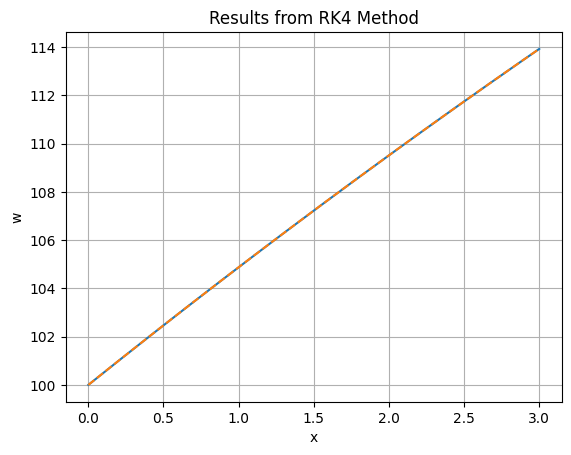

In [13]:
def RK4(f,a,b,alpha,N=None,h=None):
        # Determine step size
    if h is not None:
        N = int((b - a) / h)
    elif N is not None:
        h = (b - a) / N
    else:
        raise ValueError("Either N (steps) or h (step size) must be provided.")

    x = np.linspace(a,b, N+1)
    w = np.zeros(N+1)
    w[0] = alpha
    for i in range(N):
        k1 = h*f(x[i],w[i])
        k2 = h*f(x[i]+h/2,w[i]+k1/2)
        k3 = h*f(x[i]+h/2,w[i]+k2/2)
        k4 = h*f(x[i]+h,w[i]+k3)
        w[i+1] = w[i] + (k1+2*k2+2*k3+k4)/6
    results = np.column_stack((x, w))
    return results


def f(x, y):
    return 10-1/20 * y

def exact_solution(x):
    return 200 - 100 * np.e**(-x/20)

results = RK4(f,0,3,100,N=None, h=0.00001)
results_df = pd.DataFrame({'x': results[:,0], 'w': results[:,1]})
df_exact = pd.DataFrame({'x': np.arange(0, 3.1, 0.1)})
df_exact['exact'] = exact_solution(df_exact['x'])


print(results_df)
#plot the results
plt.plot(results_df['x'], results_df['w'])
plt.plot(df_exact['x'], df_exact['exact'], label='Exact Solution', linestyle='--')

plt.title('Results from RK4 Method')
plt.xlabel('x')
plt.ylabel('w')
plt.grid()
plt.show()

# Higher-Order Differential Equations

$$
y^{(m)}(x) = f(x,y,y'', \dots, y^{m-1}), \quad a \leq x \leq b
$$

with initial conditions $y^{(i)}(a) = \alpha_i . We can convert this to a system of equations in the form: 

mth-order system of first-order initial-value problems:

\begin{aligned}
\frac{du_1}{dt} &= f_1(t, u_1, u_2, ..., u_m), \\
\frac{du_2}{dt} &= f_2(t, u_1, u_2, ..., u_m), \\
& \vdots \\
\frac{du_m}{dt} &= f_m(t, u_1, u_2, ..., u_m).
\end{aligned}

Let $u_1 = y, u_2 = y', u_3 = y'', \dots, u_m = y^{(m-1)}$. Then we have the first-order system:
$$
\frac{du_1}{dt} = \frac{dy}{dt} = u_2, \quad \frac{du_2}{dt} = \frac{dy'}{dt} = u_3, \quad \dots , \quad \frac{du_{m-1}}{dt} = \frac{dy^{(m-2)}}{dt} = u_m
$$
with initial conditions
$$

as the se $$u_1(0) = y_0, u_2(0) = y_0', u_3(0) = y_0'', \dots, u_m(0) = y_0^{(m-1)}$$.

The system can be written as
$$
\frac{d\mathbf{u}}{dt} = \mathbf{f}(t, \mathbf{u})
$$

where $\mathbf{u} = (u_1, u_2, ..., u_m)^T$ and $\mathbf{f} = (u_2, u_3, ..., u_m, f_m(t, u_1, u_2, ..., u_m))^T$

with initial conditions:
$$
u_1(a) = y(a) = \alpha_1, \quad u_m(a) = y^{(m-1)}(a) = \alpha_m
$$
$$
\mathbf{u}(0) = \mathbf{u}_0 = (y_0, y_0', y_0'', ..., y_0^{(m-1)})^T
$$




# RK4 forSystems of D.E
Let $w_{i,0} = \alpha_i$ be initial conditions and $w_{i,j}$ has been computed. We can obtain
$w_{i,j+1} by calculating:

\begin{align*}
k_{1,i} &= h f_i(t_j, w_{1,j}, w_{2,j}, ..., w_{m,j}), \quad \text{for each } i = 1, 2, ..., m; \\
k_{2,i} &= h f_i\left(t_j + \frac{h}{2}, w_{1,j} + \frac{1}{2}k_{1,1}, w_{2,j} + \frac{1}{2}k_{1,2}, ..., w_{m,j} + \frac{1}{2}k_{1,m}\right), \\
& \quad \text{for each } i = 1, 2, ..., m; \\
k_{3,i} &= h f_i\left(t_j + \frac{h}{2}, w_{1,j} + \frac{1}{2}k_{2,1}, w_{2,j} + \frac{1}{2}k_{2,2}, ..., w_{m,j} + \frac{1}{2}k_{2,m}\right), \\
& \quad \text{for each } i = 1, 2, ..., m; \\
k_{4,i} &= h f_i(t_j + h, w_{1,j} + k_{3,1}, w_{2,j} + k_{3,2}, ..., w_{m,j} + k_{3,m}), \\
& \quad \text{for each } i = 1, 2, ..., m; \quad \text{and then} \\
w_{i,j+1} &= w_{i,j} + \frac{1}{6}(k_{1,i} + 2k_{2,i} + 2k_{3,i} + k_{4,i}).
\end{align*}

In [14]:
def rk4_sys(f, w0, x0, xf, h=None, N=None):
    if h is not None:
        N = int((xf - x0) / h)
    elif N is not None:
        h = (xf - x0) / N
    else:
        raise ValueError("Either N (steps) or h (step size) must be provided.")

    x = x0
    w = np.array(w0, dtype=float)
    solutions = [w.copy()]
    x_values = [x]

    while x < xf:  
        k1 = h * f(x, w)
        k2 = h * f(x + h / 2, w + k1 / 2)
        k3 = h * f(x + h / 2, w + k2 / 2)
        k4 = h * f(x + h, w + k3)
        w += (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h  
        solutions.append(w.copy())
        x_values.append(x)

    return np.array(x_values), np.array(solutions)



In [15]:
def f(x,y): #function takes in y as a vector of y(x) and its derivatives y^(i)(x)
    return np.array([y[1], np.e**(2*x)*np.sin(x) - 2*y[0] + 2*y[1]])

w0 = np.array([-0.4, -0.6]) #initial conditions
print(f(0,w0))

# Solve from x=0 to x=1 with step size h=0.1
x_vals, solution = rk4_sys(f, w0, 0, 1, h=0.1)

# Extract y and y' from the solution
y_vals = solution[:, 0]
yp_vals = solution[:, 1]

# Print results
print("x values:", x_vals)
print("y values:", y_vals)
print("y' values:", yp_vals)

[-0.6 -0.4]
x values: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]
y values: [-0.4        -0.46173334 -0.52555988 -0.58860144 -0.64661231 -0.69356666
 -0.7211519  -0.71815295 -0.66971133 -0.5564429  -0.35339886 -0.02885627]
y' values: [-0.6        -0.63163124 -0.64014895 -0.61366381 -0.53658203 -0.3887381
 -0.14438087  0.22899702  0.7719918   1.53478148  2.57876634  3.9783292 ]


In [16]:
def rk4_sys(f, w0, x0, xf, h=None, N=None):
    if h is not None:
        N = int((xf - x0) / h)
    elif N is not None:
        h = (xf - x0) / N
    else:
        raise ValueError("Either N (steps) or h (step size) must be provided.")
    x = x0
    w = np.array(w0, dtype=float)
    solutions = [w.copy()]
    x_values = [x]
    while x < xf:
        k1 = h * f(x, w)
        k2 = h * f(x + h / 2, w + k1 / 2)
        k3 = h * f(x + h / 2, w + k2 / 2)
        k4 = h * f(x + h, w + k3)
        w += (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
        solutions.append(w.copy())
        x_values.append(x)
    return np.array(x_values), np.array(solutions)

def f(x, y):
    return np.array([y[1], y[2], np.exp(2 * x) * np.sin(x) - 2 * y[0] + 2 * y[1] +x*y[2]]) #f(x,y,y',y'') = y'''

w0 = np.array([-0.4, -0.6, -0.1])  # initial conditions

print("Initial Conditions:")
print(f"y(0) = {w0[0]}")
print(f"y'(0) = {w0[1]}")
print("\nCalculating f(0, w0):")
result_f_0_w0 = f(0, w0)
print(f"f(0, w0) = {result_f_0_w0}")
print(f"f(0, w0)[0] = y'(0) = {result_f_0_w0[0]}")
print(f"f(0, w0)[1] = y''(0) = {result_f_0_w0[1]}")


# Solve from x=0 to x=1 with step size h=0.1
x_vals, solution = rk4_sys(f, w0, 0, 1, h=0.1)

# Extract y and y' from the solution
y_vals = solution[:, 0]
yp_vals = solution[:, 1]
ypp_vals = solution[:, 2]


# Print results in a human-friendly format
print("\nNumerical Solution using RK4:")
print("{:<10} {:<15} {:<15}".format("x", "y(x)", "y'(x)"))
print("-" * 40)
for x, y, yp in zip(x_vals, y_vals, yp_vals):
    print("{:<10.4f} {:<15.8f} {:<15.8f}".format(x, y, yp))

Initial Conditions:
y(0) = -0.4
y'(0) = -0.6

Calculating f(0, w0):
f(0, w0) = [-0.6 -0.1 -0.4]
f(0, w0)[0] = y'(0) = -0.6
f(0, w0)[1] = y''(0) = -0.1

Numerical Solution using RK4:
x          y(x)            y'(x)          
----------------------------------------
0.0000     -0.40000000     -0.60000000    
0.1000     -0.46055840     -0.61167130    
0.2000     -0.52239761     -0.62523417    
0.3000     -0.58558262     -0.63809845    
0.4000     -0.64988224     -0.64687586    
0.5000     -0.71467127     -0.64700281    
0.6000     -0.77878950     -0.63224864    
0.7000     -0.84034409     -0.59406718    
0.8000     -0.89643708     -0.52073678    
0.9000     -0.94279330     -0.39621495    
1.0000     -0.97325560     -0.19860917    
1.1000     -0.97910246     0.10186986     


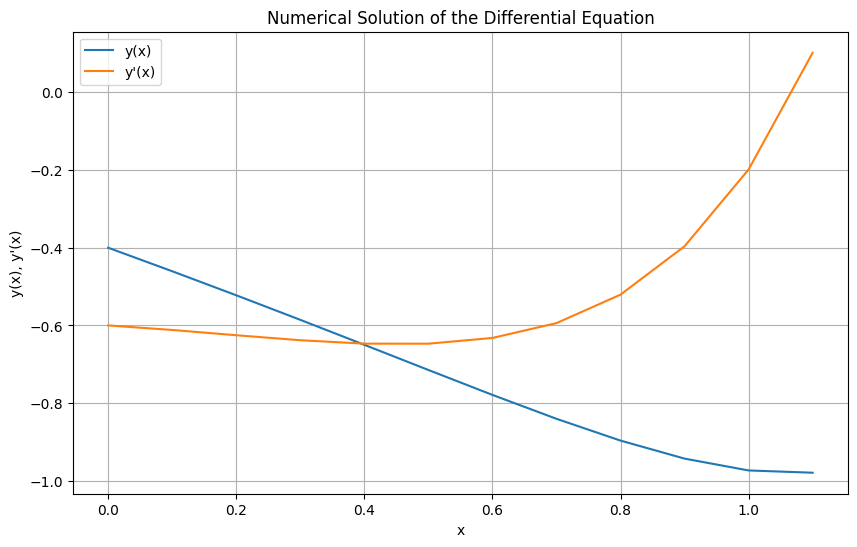

In [17]:
# Plot the solutions
plt.figure(figsize=(10, 6))

plt.plot(x_vals, y_vals, label="y(x)")
plt.plot(x_vals, yp_vals, label="y'(x)")

plt.xlabel("x")
plt.ylabel("y(x), y'(x)")
plt.title("Numerical Solution of the Differential Equation")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
import numpy as np  # Don't forget to import numpy

def rk4_sys(f, w0, x0, xf, h=None, N=None):
    if h is not None:
        N = int((xf - x0) / h)
    elif N is not None:
        h = (xf - x0) / N
    else:
        raise ValueError("Either N (steps) or h (step size) must be provided.")
    
    x = x0
    w = np.array(w0, dtype=float)
    solutions = [w.copy()]
    x_values = [x]
    
    while x < xf:
        k1 = h * f(x, w)
        k2 = h * f(x + h / 2, w + k1 / 2)
        k3 = h * f(x + h / 2, w + k2 / 2)
        k4 = h * f(x + h, w + k3)
        
        w += (k1 + 2*k2 + 2*k3 + k4) / 6
        x += h
        
        solutions.append(w.copy())
        x_values.append(x)
    
    return np.array(x_values), np.array(solutions)

def f(x, y):  # function takes in y as a vector of y(x) and its derivatives y^(i)(x)
    return np.array([y[1], np.e**(2*x) * np.sin(x) - 2*y[0] + 2*y[1]])

w0 = np.array([-0.4, -0.6])  # initial conditions
print("Initial conditions f(0, w0):", f(0, w0))

# Solve from x=0 to x=1 with step size h=0.1
x_vals, solution = rk4_sys(f, w0, 0, 1, h=0.1)

# Extract y and y' from the solution
y_vals = solution[:, 0]
yp_vals = solution[:, 1]

# Print results in a human-friendly format
print("\nResults:")
for x, y, yp in zip(x_vals, y_vals, yp_vals):
    print(f"x: {x:.2f}, y: {y:.4f}, y': {yp:.4f}")

Initial conditions f(0, w0): [-0.6 -0.4]

Results:
x: 0.00, y: -0.4000, y': -0.6000
x: 0.10, y: -0.4617, y': -0.6316
x: 0.20, y: -0.5256, y': -0.6401
x: 0.30, y: -0.5886, y': -0.6137
x: 0.40, y: -0.6466, y': -0.5366
x: 0.50, y: -0.6936, y': -0.3887
x: 0.60, y: -0.7212, y': -0.1444
x: 0.70, y: -0.7182, y': 0.2290
x: 0.80, y: -0.6697, y': 0.7720
x: 0.90, y: -0.5564, y': 1.5348
x: 1.00, y: -0.3534, y': 2.5788
x: 1.10, y: -0.0289, y': 3.9783


# Boundary Valued Problem


$y'' = f(x,y,y')$ for $ a \leq x \leq b$ together with 
$ y(a) = \alpha$and $y(b) = \beta$

# Rayleigh Ritz

# Partial Differential Equations

## Elliptic Partial Differential Equations

$$
\nabla^2 u(x,y) = \frac{\partial^2 }{\partial x^2} u(x,y) +  \frac{\partial^2 }{\partial y^2} u(x,y) = f(x,y)
$$
on $R = {(x,y) | a <x <b,  c< y < d}$ 


$$
\frac{\partial u}{\partial n} = \nabla u \cdot \mathbf{n} = \frac{\partial u}{\partial x} \cos \theta + \frac{\partial u}{\partial y} \sin \theta
$$


hello







Converged in 4228 iterations


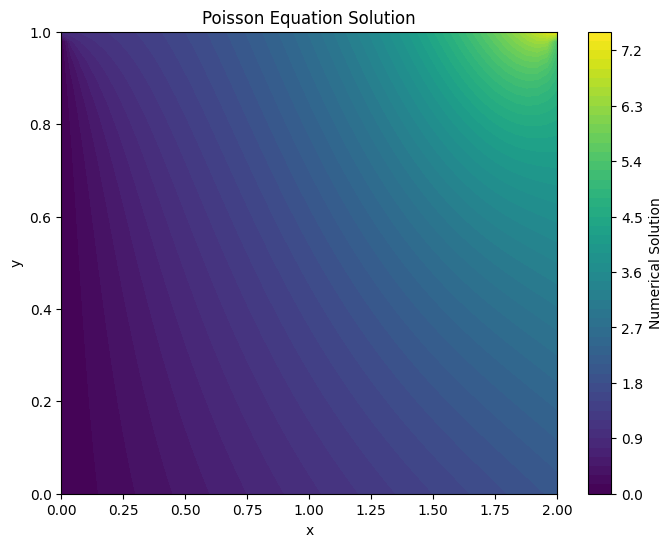

In [19]:
# Domain parameters
Nx, Ny = 50, 50  # Number of grid points in x and y
x_min, x_max = 0, 2
y_min, y_max = 0, 1
hx = (x_max - x_min) / (Nx - 1)
hy = (y_max - y_min) / (Ny - 1)

# Generate grid
x = np.linspace(x_min, x_max, Nx)
y = np.linspace(y_min, y_max, Ny)
X, Y = np.meshgrid(x, y, indexing='ij')

# Initialize solution grid
u = np.zeros((Nx, Ny))

# Apply boundary conditions
u[0, :] = 0              # u(0, y) = 0
u[-1, :] = 2 * np.exp(y) # u(2, y) = 2e^y
u[:, 0] = x             # u(x, 0) = x
u[:, -1] = np.exp(x)    # u(x, 1) = e^x

# Source term f(x, y) = x * e^y
f = X * np.exp(Y)

# Iterative solver parameters
max_iter = 10000
error_tol = 1e-6
omega = 1.5  # Over-relaxation factor for SOR

# Jacobi iteration
for it in range(max_iter):
    u_new = np.copy(u)
    
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            u_new[i, j] = (hx**2 * hy**2 / (2 * (hx**2 + hy**2))) * (
                (u[i+1, j] + u[i-1, j]) / hx**2 +
                (u[i, j+1] + u[i, j-1]) / hy**2 - f[i, j]
            )
    
    # Compute error
    error = np.max(np.abs(u_new - u))
    if error < error_tol:
        print(f'Converged in {it} iterations')
        break
    
    u = u_new

# Exact solution
u_exact = X * np.exp(Y)

# Plot results
plt.figure(figsize=(8,6))
plt.contourf(X, Y, u, 50, cmap='viridis')
plt.colorbar(label='Numerical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Poisson Equation Solution')
plt.show()


In [20]:
# Grid size and parameters
Nx, Ny = 50, 50
x_min, x_max = 0, 2
y_min, y_max = 0, 1
dx = (x_max - x_min) / (Nx - 1)
dy = (y_max - y_min) / (Ny - 1)
dt = min(dx, dy)**2 / 4  # Stability condition
max_iter = 5000
tolerance = 1e-6

# Generate grid
x = np.linspace(x_min, x_max, Nx)
y = np.linspace(y_min, y_max, Ny)
X, Y = np.meshgrid(x, y, indexing='ij')

# Initialize u and source term f(x, y)
u = np.zeros((Nx, Ny))
f = X * np.exp(Y)

# Apply boundary conditions
u[0, :] = 0               # u(0, y) = 0
u[-1, :] = 2 * np.exp(y)  # u(2, y) = 2e^y
u[:, 0] = x               # u(x, 0) = x
u[:, -1] = np.exp(x)      # u(x, 1) = e^x

# Time-stepping loop
for n in range(max_iter):
    u_new = np.copy(u)
    
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            u_new[i, j] = u[i, j] + dt * (
                (u[i+1, j] - 2*u[i, j] + u[i-1, j]) / dx**2 +
                (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / dy**2 - f[i, j]
            )

    # Check for convergence
    error = np.max(np.abs(u_new - u))
    if error < tolerance:
        print(f"Converged in {n} iterations")
        break
    
    u = u_new  # Update solution

# Plot the result
plt.figure(figsize=(8,6))
plt.contourf(X, Y, u, 50, cmap='viridis')
plt.colorbar(label='Numerical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Poisson Equation via Time-Stepping')
plt.show()

KeyboardInterrupt: 

In [ ]:
# Grid size and parameters
Nx, Ny = 50, 50
x_min, x_max = 0, 2
y_min, y_max = 0, 1
dx = (x_max - x_min) / (Nx - 1)
dy = (y_max - y_min) / (Ny - 1)
dt = min(dx, dy)**2 / 4  # Stability condition for time-stepping
max_iter = 5000
tolerance = 1e-6

# Generate grid
x = np.linspace(x_min, x_max, Nx)
y = np.linspace(y_min, y_max, Ny)
X, Y = np.meshgrid(x, y, indexing='ij')

# Initialize solutions
u_jacobi = np.zeros((Nx, Ny))
u_time_step = np.zeros((Nx, Ny))
f = X * np.exp(Y)  # Right-hand side of Poisson equation

# Apply boundary conditions
u_jacobi[0, :] = u_time_step[0, :] = 0               # u(0, y) = 0
u_jacobi[-1, :] = u_time_step[-1, :] = 2 * np.exp(y)  # u(2, y) = 2e^y
u_jacobi[:, 0] = u_time_step[:, 0] = x               # u(x, 0) = x
u_jacobi[:, -1] = u_time_step[:, -1] = np.exp(x)     # u(x, 1) = e^x

# Exact solution for comparison
u_exact = X * np.exp(Y)

# Storage for errors
errors_jacobi = []
errors_time_step = []

# Jacobi iteration
for n in range(max_iter):
    u_new = np.copy(u_jacobi)
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            u_new[i, j] = 0.25 * (u_jacobi[i+1, j] + u_jacobi[i-1, j] +
                                  u_jacobi[i, j+1] + u_jacobi[i, j-1] - dx**2 * f[i, j])

    # Compute error
    error = np.max(np.abs(u_new - u_jacobi))
    errors_jacobi.append(error)
    if error < tolerance:
        print(f"Jacobi Converged in {n} iterations")
        break

    u_jacobi = u_new

# Time-stepping method
for n in range(max_iter):
    u_new = np.copy(u_time_step)
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            u_new[i, j] = u_time_step[i, j] + dt * (
                (u_time_step[i+1, j] - 2*u_time_step[i, j] + u_time_step[i-1, j]) / dx**2 +
                (u_time_step[i, j+1] - 2*u_time_step[i, j] + u_time_step[i, j-1]) / dy**2 - f[i, j]
            )

    # Compute error
    error = np.max(np.abs(u_new - u_time_step))
    errors_time_step.append(error)
    if error < tolerance:
        print(f"Time-stepping Converged in {n} iterations")
        break

    u_time_step = u_new

# Compute absolute difference between methods
diff = np.abs(u_jacobi - u_time_step)

# Plot solutions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Jacobi Solution
ax1 = axes[0, 0]
c1 = ax1.contourf(X, Y, u_jacobi, 50, cmap='viridis')
fig.colorbar(c1, ax=ax1)
ax1.set_title("Jacobi Iteration Solution")

# Time-stepping Solution
ax2 = axes[0, 1]
c2 = ax2.contourf(X, Y, u_time_step, 50, cmap='viridis')
fig.colorbar(c2, ax=ax2)
ax2.set_title("Time-Stepping Solution")

# Exact Solution
ax3 = axes[0, 2]
c3 = ax3.contourf(X, Y, u_exact, 50, cmap='viridis')
fig.colorbar(c3, ax=ax3)
ax3.set_title("Exact Solution")

# Error plots
ax4 = axes[1, 0]
ax4.plot(errors_jacobi, label="Jacobi Error")
ax4.plot(errors_time_step, label="Time-Stepping Error")
ax4.set_yscale("log")
ax4.set_xlabel("Iteration")
ax4.set_ylabel("Max Error")
ax4.set_title("Convergence Rate")
ax4.legend()

# Difference Between Solutions
ax5 = axes[1, 1]
c5 = ax5.contourf(X, Y, diff, 50, cmap='inferno')
fig.colorbar(c5, ax=ax5)
ax5.set_title("Difference |Jacobi - Time-Stepping|")

# Exact vs Jacobi error
ax6 = axes[1, 2]
c6 = ax6.contourf(X, Y, np.abs(u_jacobi - u_exact), 50, cmap='coolwarm')
fig.colorbar(c6, ax=ax6)
ax6.set_title("Jacobi vs. Exact Error")

plt.tight_layout()
plt.show()

Jacobi Converged in 4140 iterations


KeyboardInterrupt: 